In [9]:
import os
import pickle
import numpy as np


# Create DataFrame from the table data
data = {
    'Dataset': ['1a', '1b', '1c', '2a', '2b', '2c', '3a', '3b', '3c'],
    'Mean': [],
    'Std': []
}

for dataset_id in data['Dataset']:
    cka = []
    for x in os.listdir('../results/'):
        if x.endswith(".pkl") and x.startswith(dataset_id):
            full_path = os.path.join('../results/', x)
            with open(full_path, 'rb') as file:
                experiment = pickle.load(file)

            cka.append(experiment['log'][-1]["max"])

    data['Mean'].append(np.mean(cka))
    data['Std'].append(np.std(cka))

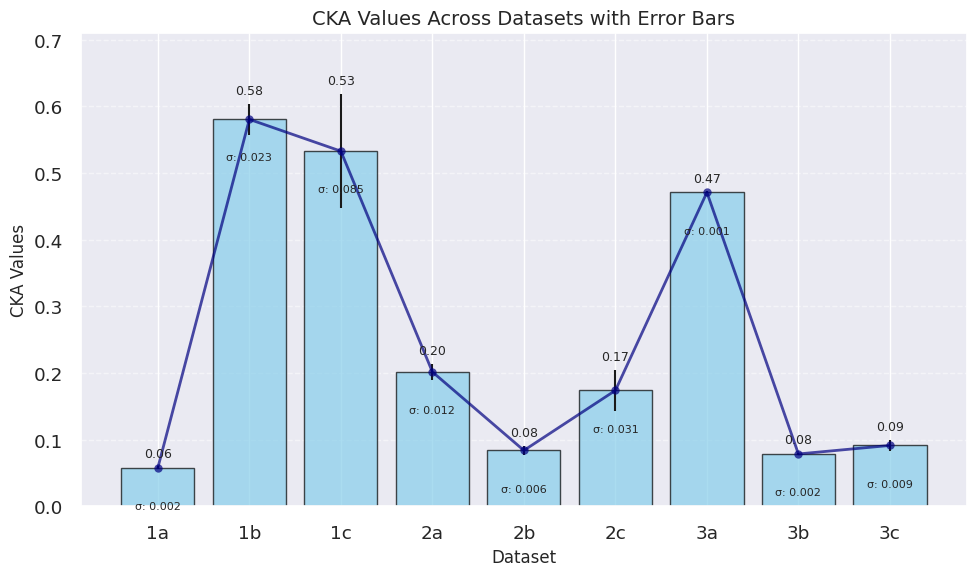

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(data)

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create x positions for the bars
x_pos = np.arange(len(df['Dataset']))

# Plot the bar chart with error bars
bars = plt.bar(x_pos, df['Mean'], yerr=df['Std'], capsize=5, 
        color='skyblue', edgecolor='black', alpha=0.7)

# Plot a line connecting the means to emphasize the decay trend
plt.plot(x_pos, df['Mean'], 'o-', color='navy', linewidth=2, alpha=0.7)

# Add value labels on top of each bar
for i, (mean, std) in enumerate(zip(df['Mean'], df['Std'])):
    plt.text(i, mean + std + 0.01, f'{mean:.2f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('CKA Values', fontsize=12)
plt.title('CKA Values Across Datasets with Error Bars', fontsize=14)

# Set the tick positions and labels
plt.xticks(x_pos, df['Dataset'])

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5, axis='y')

# Adjust y-axis range to accommodate the data and labels
plt.ylim(0, max(df['Mean'] + df['Std']) * 1.15)

# Add annotations for standard deviation values
for i, (mean, std) in enumerate(zip(df['Mean'], df['Std'])):
    plt.text(i, mean - 0.05, f'σ: {std:.3f}', ha='center', va='top', fontsize=8)

plt.tight_layout()

In [11]:
import pickle

file = "1b_raw_3_2025-08-11_00.33.13"

with open(f"../results/{file}.pkl",'rb') as file:
    results = pickle.load(file)

kwargs = results['kwargs']
log_data = results['log']
population = results['population']

mins = []
avgs = []
maxs = []

for elem in log_data:
    mins.append(elem['min'])
    avgs.append(elem['avg'])
    maxs.append(elem['max'])

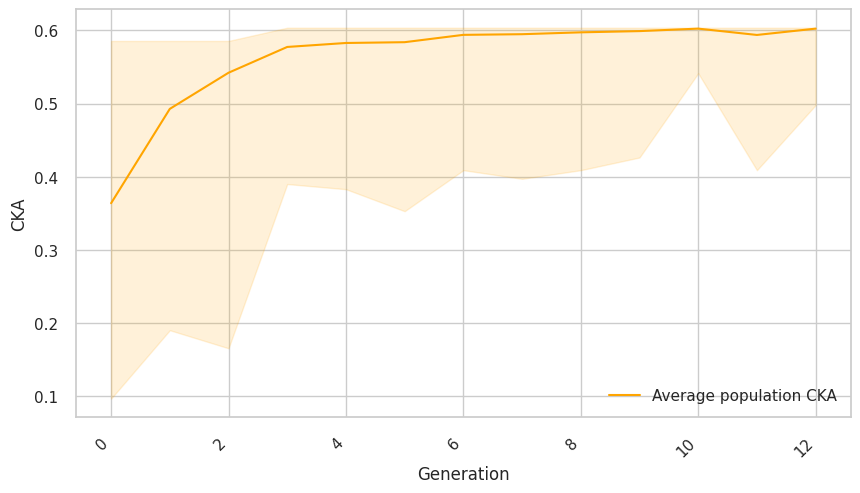

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.lineplot(avgs, label="Average population CKA", color="orange")
ax.fill_between(
    x=range(len(avgs)), y1=mins, y2=maxs, color='orange', alpha=.15)
ax.figure.autofmt_xdate(rotation=45)

plt.ylabel("CKA")
plt.xlabel("Generation")
plt.legend()
plt.show()

# Individual tests

From the sets on _results_ (10-08-2025)

In [13]:
import pandas as pd

auc_data = pd.DataFrame(
    {
        "Dataset" : ["1a","1b","1c", "2a","2b","2c","3a","3b","3c"],
        "linear" : [0.919799, 0.335937,0.99733,0.555989,0.5833,0.4596,0.51128,0.3333,0.6867],
        "poly" : [0.9085213, 0.6328,0.9946667, 1.0,0.78283,0.39646,0.90225,0.91729,0.9122807],
        "rbf" : [0.914786, 1.0, 1.0, 1.0,0.997475,0.555, 1.0,0.987469,0.947368],
        "z" : [0.41604, 1.0, 1.0,0.375,0.80555, 0.992424,0.651629,0.686717,0.7719],
        "zz" : [0.746867, 0.85416, 0.744,0.880208,0.82323,0.5656,0.872180,0.38972,0.5914787],
        "best" : [0.586466, 1.0, 1.0,0.8854167,0.85606,0.992424,0.874687,0.548872,0.754386]
    }
)

cka_data = pd.DataFrame(
    {
        "Dataset" : ["1a","1b","1c", "2a","2b","2c","3a","3b","3c"],
        "z cka": [0.0180713,0.21279, 0.38845, 0.021262, 0.04075,0.19697,0.056369,0.061017,0.08133],
        "zz cka" : [0.043700,0.142296,0.1084, 0.060382, 0.0574020, 0.0323995,0.12376,0.0524685,0.04656],
        "best cka" : [0.056085, 0.60377,0.447696, 0.189901, 0.090318, 0.204709,0.47249,0.080479,0.100343],
    }
)

quantum_data = pd.DataFrame(
    {
        "Dataset" : ["1a","1b","1c", "2a","2b","2c","3a","3b","3c"],
        "best CKA" : [0.056085, 0.60377,0.447696, 0.189901, 0.090318, 0.204709,0.47249,0.080479,0.100343],
        "best AUC" : [0.586466, 1.0, 1.0,0.8854167,0.85606,0.992424,0.874687,0.548872,0.754386],
        "depth" : [22, 19, 13, 20, 23, 23, 22, 16, 15],
        "expressivity" : [0.6159216484124485, 0.4542618586253581, 0.5506955984611149, 0.949821648412, 0.6364113589, 0.576573483801, 0.858979724, 0.41621858706, 0.75264450641],
        "entanglement" : [0.4090255, 0.51613217, 0.28068349, 0.6086863667, 0.43171100518941913,0.32410280133755553, 0.36924675855511807,0.15814655777695047, 0.16772414762810478 ]

    }
)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert to DataFrames
auc_df = pd.DataFrame(auc_data).set_index('Dataset')
quantum_df = pd.DataFrame(quantum_data).set_index('Dataset')

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.2)

# Plot AUC performance heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(auc_df, annot=True, fmt='.3f', cmap='YlGnBu', cbar_kws={'label': 'ROC AUC'})
plt.title('ROC AUC Performance Across Datasets and Classifiers')
plt.xlabel('Classifier Type')
plt.ylabel('Dataset')
plt.tight_layout()
plt.savefig('auc_heatmap.pdf', format='pdf', bbox_inches='tight')
plt.close()

In [15]:
# Create DataFrame
df = quantum_data

# Select relevant columns for correlation analysis
columns = ['depth', 'expressivity', 'entanglement', 'best CKA', 'best AUC']
corr_df = df[columns]

# Create scatter plot matrix
g = sns.pairplot(corr_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50})
g.fig.suptitle('Correlation Between Quantum Characteristics and AUC Performance', y=1.02)
plt.tight_layout()

# Save the plot
plt.savefig('correlation_scatter.pdf', format='pdf', bbox_inches='tight')
plt.close()

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Create DataFrame
df = quantum_data

# Select relevant columns for correlation analysis
columns = ['depth', 'expressivity', 'entanglement', 'best CKA', 'best AUC']
corr_df = df[columns]

# Calculate correlation matrix
corr_matrix = corr_df.corr()

# Create scatter plot matrix
g = sns.pairplot(corr_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50})
g.fig.suptitle('Correlation Between Quantum Characteristics and AUC Performance', y=1.02)

# Create a colormap for correlation values
norm = Normalize(vmin=-1, vmax=1)
cmap = cm.RdBu_r  # Red for positive, blue for negative correlations

# Add correlation values with color coding to off-diagonal plots
for i in range(len(columns)):
    for j in range(len(columns)):
        if i != j:  # Off-diagonal entries only
            ax = g.axes[i, j]
            
            # Get correlation value
            corr_val = corr_matrix.iloc[i, j]
            
            # Choose color based on correlation strength
            color = cmap(norm(corr_val))
            
            # Add correlation text with colored background
            ax.text(0.05, 0.95, f'r = {corr_val:.3f}', 
                   transform=ax.transAxes, 
                   fontsize=10, 
                   verticalalignment='top',
                   bbox=dict(boxstyle='round,pad=0.3', 
                            facecolor=color, 
                            alpha=0.8,
                            edgecolor='black',
                            linewidth=0.5))

# Add a colorbar to show the correlation scale
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
#cbar = g.fig.colorbar(sm, ax=g.axes, shrink=0.8, aspect=20, pad=0.02)
#cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15)

plt.tight_layout()

# Save the plot
plt.savefig('correlation_scatter.pdf', format='pdf', bbox_inches='tight')
plt.close()

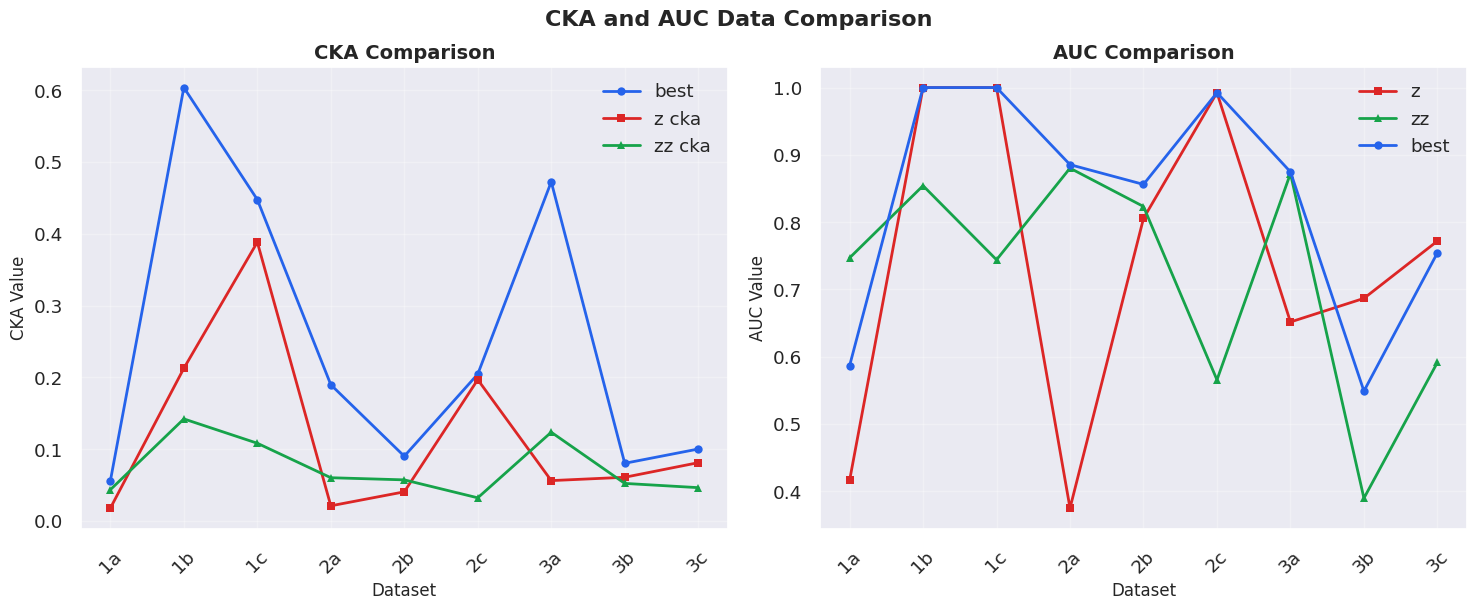

In [17]:
# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Define colors
colors = {
    'best': '#2563eb',  # Blue
    'z': '#dc2626',     # Red
    'zz': '#16a34a',    # Green
    'z_cka': '#dc2626', # Red
    'zz_cka': '#16a34a' # Green
}

# Left plot - CKA Comparison
datasets = cka_data['Dataset']
x_pos = np.arange(len(datasets))

ax1.plot(x_pos, cka_data['best cka'], 'o-', color=colors['best'], 
         linewidth=2, markersize=6, label='best', markerfacecolor=colors['best'])
ax1.plot(x_pos, cka_data['z cka'], 's-', color=colors['z_cka'], 
         linewidth=2, markersize=6, label='z cka', markerfacecolor=colors['z_cka'])
ax1.plot(x_pos, cka_data['zz cka'], '^-', color=colors['zz_cka'], 
         linewidth=2, markersize=6, label='zz cka', markerfacecolor=colors['zz_cka'])

ax1.set_xlabel('Dataset', fontsize=12)
ax1.set_ylabel('CKA Value', fontsize=12)
ax1.set_title('CKA Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(datasets, rotation=45)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Right plot - AUC Comparison
ax2.plot(x_pos, auc_data['z'], 's-', color=colors['z'], 
         linewidth=2, markersize=6, label='z', markerfacecolor=colors['z'])
ax2.plot(x_pos, auc_data['zz'], '^-', color=colors['zz'], 
         linewidth=2, markersize=6, label='zz', markerfacecolor=colors['zz'])
ax2.plot(x_pos, auc_data['best'], 'o-', color=colors['best'], 
         linewidth=2, markersize=6, label='best', markerfacecolor=colors['best'])

ax2.set_xlabel('Dataset', fontsize=12)
ax2.set_ylabel('AUC Value', fontsize=12)
ax2.set_title('AUC Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(datasets, rotation=45)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Adjust layout and display
plt.tight_layout()
plt.suptitle('CKA and AUC Data Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.show()
